# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 71966.92 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 99404.25 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 113458.78 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 126641.57 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 138261.31 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 146594.74 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72245.13 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 103716.05 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 123094.41 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 135333.06 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142242.42 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 150327.13 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.16 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 38.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.58 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.66 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.42 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.01 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.87 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.99 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.85 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.25 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.50 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.33 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.91 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.12 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.10 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.11 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.65 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.92 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.04 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.78 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.90 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.62 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.73 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.48 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.29 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.58 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.43 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.13 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.11 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 44.58 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.18 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.88 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.21 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.61 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.49 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.50 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.62 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.67 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.83 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.86 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.92 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.93 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.18 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.53 examples/s]

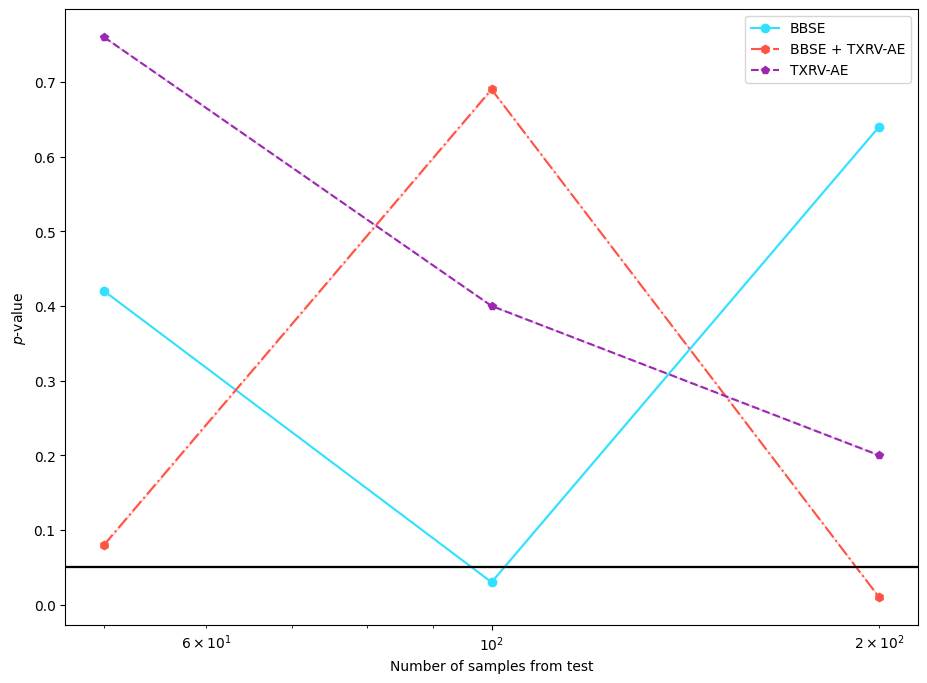

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.17 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.50 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.75 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.20 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.96 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.16 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.36 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.71 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.07 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.63 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.98 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.86 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.53 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.80 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.61 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.55 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.80 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.65 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.19 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.54 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.11 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.57 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.65 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.46 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.28 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.22 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.63 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.12 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.69 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.38 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.41 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.94 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.26 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.15 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.87 examples/s]

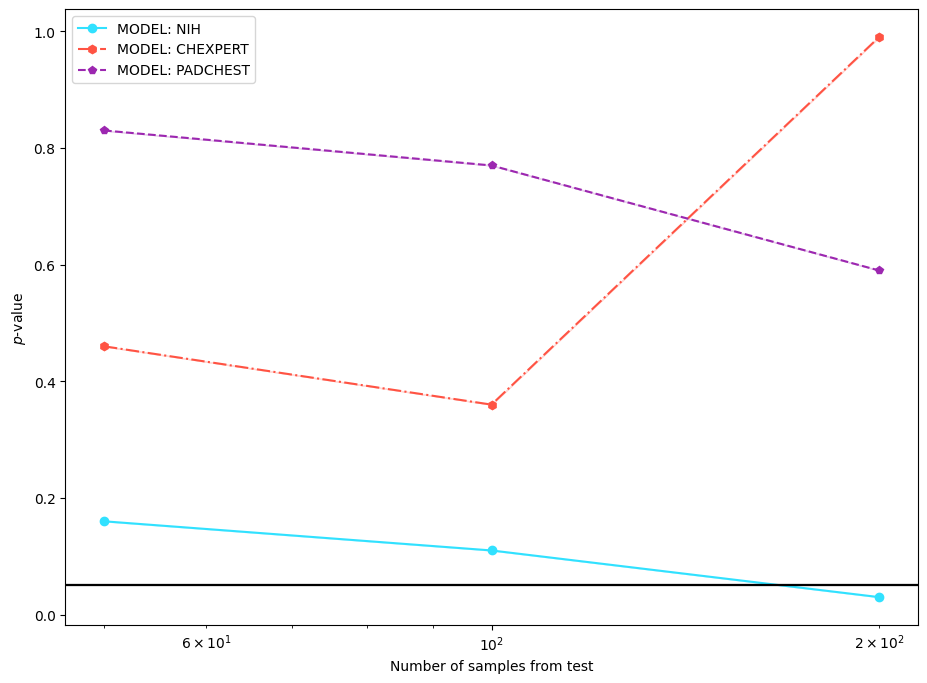

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 58978.64 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82853.40 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93729.81 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100639.84 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97495.13 examples/s] 

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107408.66 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55613.28 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72465.56 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85340.12 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95509.39 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 108803.60 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 119530.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.32 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.75 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.25 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.44 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.12 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.44 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.87 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.62 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.64 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.52 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.16 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.51 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.01 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.51 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51532.29 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72357.79 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85466.70 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95330.31 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102406.72 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107109.34 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52170.77 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80712.07 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92633.77 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100317.75 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 104003.03 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108357.58 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.76 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.96 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.91 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.12 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.74 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.06 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.62 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.28 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.22 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.11 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.23 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.77 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55309.25 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79207.67 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95521.03 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101551.45 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 105737.36 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110049.27 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52475.49 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70005.77 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 80920.59 examples/s]

Filter (num_proc=6):  65%|██████▌   | 73061/112120 [00:00<00:00, 84276.10 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101716.15 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106925.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.08 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.98 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.95 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.41 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.90 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.30 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.90 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.47 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.01 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.55 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.39 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.45 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.63 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.24 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56655.08 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80460.19 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92527.88 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99004.69 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 103075.27 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106959.61 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54532.65 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78151.15 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91360.21 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98487.27 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 103527.33 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106969.99 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.23 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.71 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.38 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.59 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.28 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.29 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.96 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.02 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.81 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.20 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.93 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.89 examples/s]

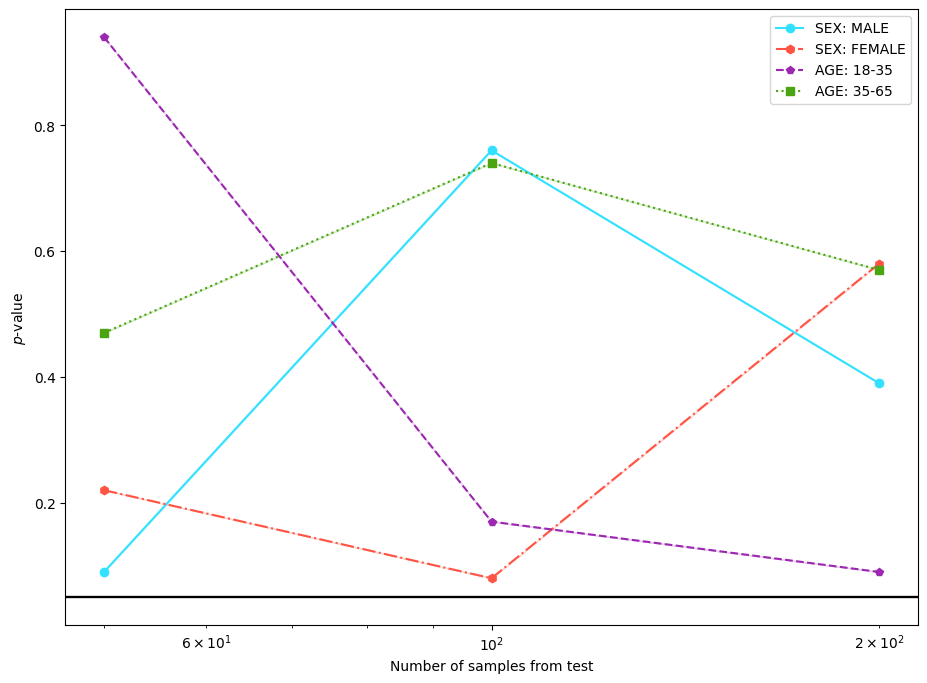

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.23 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.01 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.98 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.83 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.51 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.25 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.59 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.68 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.20 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.26 examples/s]

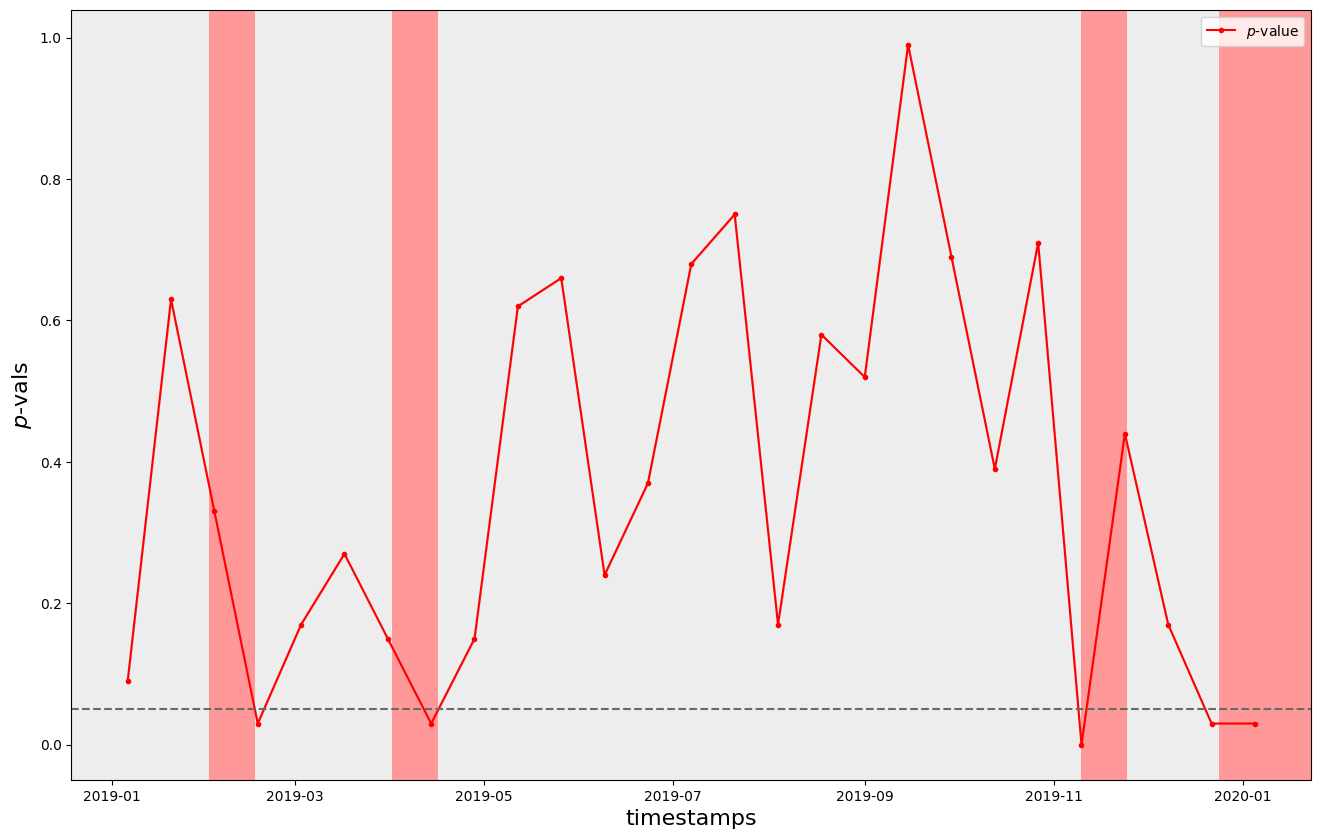

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)